# Start


In [108]:
import numpy as np
import pandas as pd
from collections import UserDict, defaultdict
import json
import pickle
import ast

In [138]:
def send_to_dataframe(l):
    r=pd.DataFrame.from_dict(l[0],orient='index')
    #print(r)
    for i  in l[1:]:
        #print(e)
        e=pd.DataFrame.from_dict(i,orient='index')
        r=pd.concat([r, e], axis=1)
        #print(r)
    df=r.T.reset_index().drop(columns=['index'])
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

list_of_dictionaries=[]
for line in  open("smiles_datasets_experiments.txt", 'r'):
    line=line.rstrip('n')
    #print(line)
    dictionary = ast.literal_eval(line)
    list_of_dictionaries.append(dictionary)




In [145]:
df=send_to_dataframe(list_of_dictionaries) 
df=df.fillna(0)
#print(df.columns)

generators_labels=['STGG','GDSS','HierVAE','MoFlow','WGAN','Train1']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']
structural_metrics=['wl_mmd','nspdk_mmd']
molecular_metrics=molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

generators=['stgg','gdss','hiervae','moflow','wgan','train1']
df_mean_by_generator=df.groupby('generator_name').mean()
df_mean_by_dataset=df.groupby('dataset').mean()

stgg=df.loc[(df.generator_name=='stgg')]
gdss=df.loc[(df.generator_name=='gdss')]
moflow=df.loc[(df.generator_name=='moflow')]
wgan=df.loc[(df.generator_name=='wgan')]
hiervae=df.loc[(df.generator_name=='hiervae')]


gdss_25=df.loc[(df.generator_name=='gdss') & (df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25') ]


In [140]:
df[['dataset', 'generator_name','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nspdk_time']][df.generator_name=='stgg']

,dataset,generator_name,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time
48,ames_25,stgg,0.000000,44.317219
49,ames_33,stgg,0.000000,43.186001
50,ames_40,stgg,0.000000,43.255234
51,ames_50,stgg,0.000000,43.425091
52,bbb_martins_25,stgg,0.449957,18.282643
53,bbb_martins_33,stgg,0.633262,18.450387
54,bbb_martins_40,stgg,0.748522,19.334396
55,bbb_martins_50,stgg,0.612173,19.088255
56,cyp1a2_veith_25,stgg,0.000000,108.231014
57,cyp1a2_veith_33,stgg,0.000000,109.282891


#  Correlation

valid                                   NaN
unique@1000                        0.369468
unique@10000                       0.340678
FCD/Test                          -0.221295
SNN/Test                           0.326660
Frag/Test                          0.209075
FCD/TestSF                         0.165169
SNN/TestSF                         0.381413
Frag/TestSF                             NaN
IntDiv                            -0.216302
IntDiv2                           -0.182712
Filters                            0.256153
logP                              -0.418615
SA                                -0.336219
QED                               -0.432650
weight                            -0.369245
Novelty                                 NaN
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

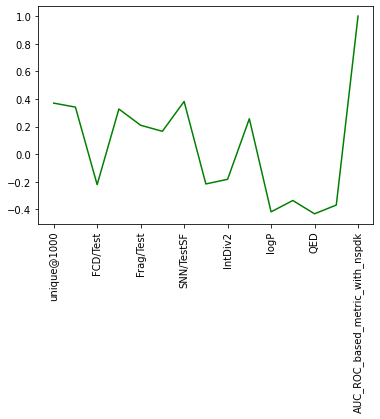

In [142]:
dft=df
molecular_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft=df[molecular_metrics].apply(pd.to_numeric)
molecular_metrics.pop()
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk']).dropna().plot(kind='line',rot=90,color="green")
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk'])

wl_mmd                            -0.351783
nspdk_mmd                         -0.350797
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

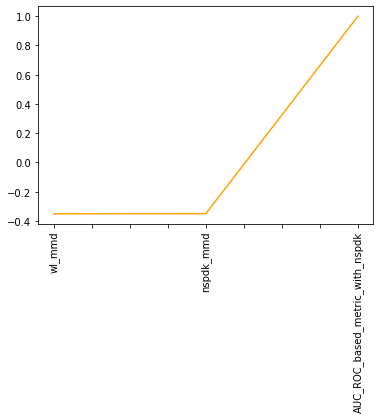

In [143]:
structural_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft2=df[structural_metrics].apply(pd.to_numeric)
structural_metrics.pop()
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="orange")
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk'])

<AxesSubplot: >

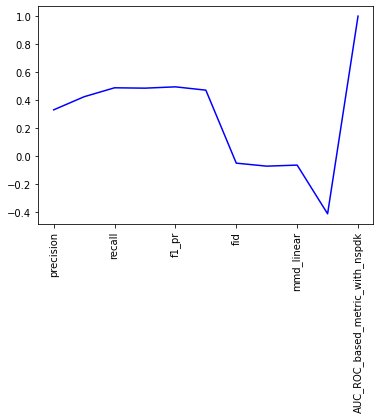

In [144]:
nn_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft3=df[nn_metrics].apply(pd.to_numeric)
nn_metrics.pop()
dft3.corrwith(dft3['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="blue")

# New metric

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (6).

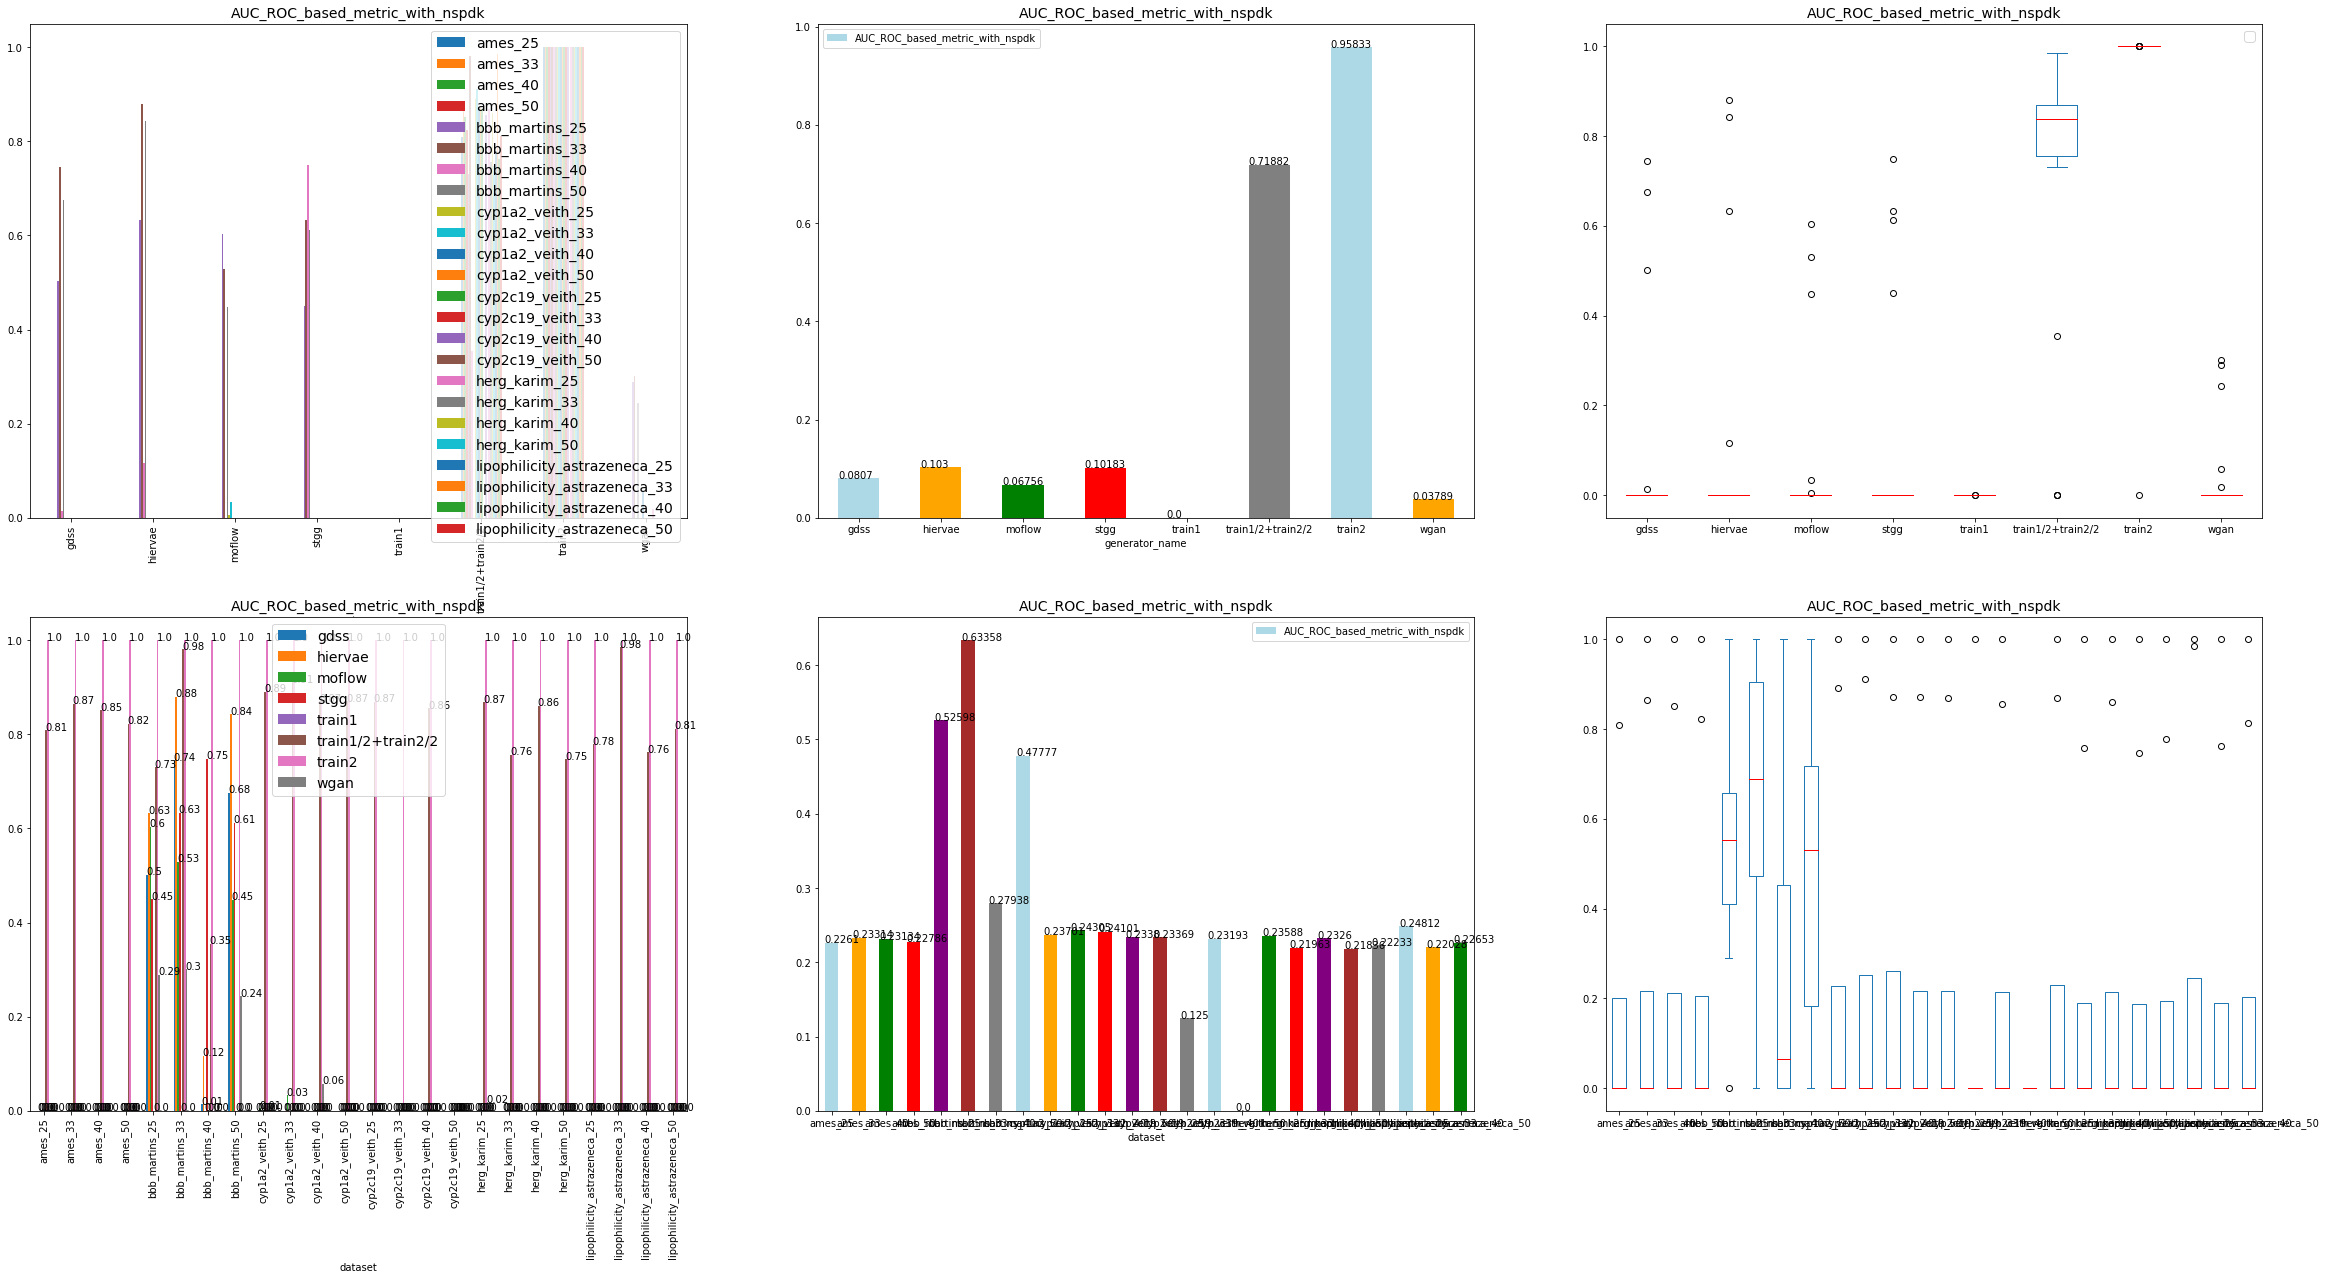

In [146]:

from matplotlib import pyplot as plt
def look_at_data_according_to_a_metric(metric_name):
    c = ['lightblue', 'orange', 'green', 'red', 'purple','gray']

    fig, ax = plt.subplots(2,3,figsize=(40, 20))
    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(ax=ax[0,0],kind='bar')
    ax[0,0].set_title(metric_name,fontsize=14)
    #ax[0,0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,0].legend(fontsize=14, loc='upper right')
    #for p in ax[0,0].patches:
        #ax[0,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))



    df_mean_by_generator[metric_name].plot.bar(ax=ax[0,1],rot=0,stacked=False,color =  c)
    ax[0,1].legend(fontsize=10,)
    ax[0,1].set_title(metric_name,fontsize=14)
    #ax[0,1].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=

    for p in ax[0,1].patches:
        ax[0,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))


    c = ['lightblue', 'orange', 'green', 'red', 'purple','brown','gray']
    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='box',ax=ax[0,2],color=dict(medians='r'))
    ax[0,2].set_title(metric_name,fontsize=14)
    #ax[0,2].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,2].legend(fontsize=14)

    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='bar',ax=ax[1,0])
    ax[1,0].set_title(metric_name,fontsize=14)
    #ax[1,0].set_xticklabels(datasets,fontdict={'fontsize':14})
    ax[1,0].legend(fontsize=14)
    for p in  ax[1,0].patches:
        ax[1,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))


    ax[1,1]=df_mean_by_dataset[metric_name].plot.bar(ax=ax[1,1],rot=0,stacked=False,color =  c)
    ax[1,1].legend(fontsize=10)
    ax[1,1].set_title(metric_name,fontsize=14)
    #ax[1,1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1,1].patches:
        ax[1,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height())  )

    
    import matplotlib

    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(kind='box',ax=ax[1,2],color=dict(medians='r'))
    ax[1,2].set_title(metric_name,fontsize=14)
    ax[1,2].set_xticklabels(datasets,fontdict={'fontsize':14})
    #ax[1,2].set_label(generators_labels)
    ax[1,2].legend(fontsize=14)

    



look_at_data_according_to_a_metric('AUC_ROC_based_metric_with_nspdk')




In [147]:
df[['dataset','generator_name','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nspdk_time']]

,dataset,generator_name,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time
0,ames_25,wgan,0.000000,35.523117
1,ames_33,wgan,0.000000,32.454576
2,ames_40,wgan,0.000000,35.166520
3,ames_50,wgan,0.000000,35.502420
4,bbb_martins_25,wgan,0.289118,13.997270
...,...,...,...,...
187,herg_karim_50,train1/2+train2/2,0.746907,146.517917
188,lipophilicity_astrazeneca_25,train1/2+train2/2,0.778662,37.186378
189,lipophilicity_astrazeneca_33,train1/2+train2/2,0.984938,38.245790
190,lipophilicity_astrazeneca_40,train1/2+train2/2,0.762258,38.830425


## New metrics's Time

KeyError: "['AUC_ROC_based_metric_with_nn_classifier'] not in index"

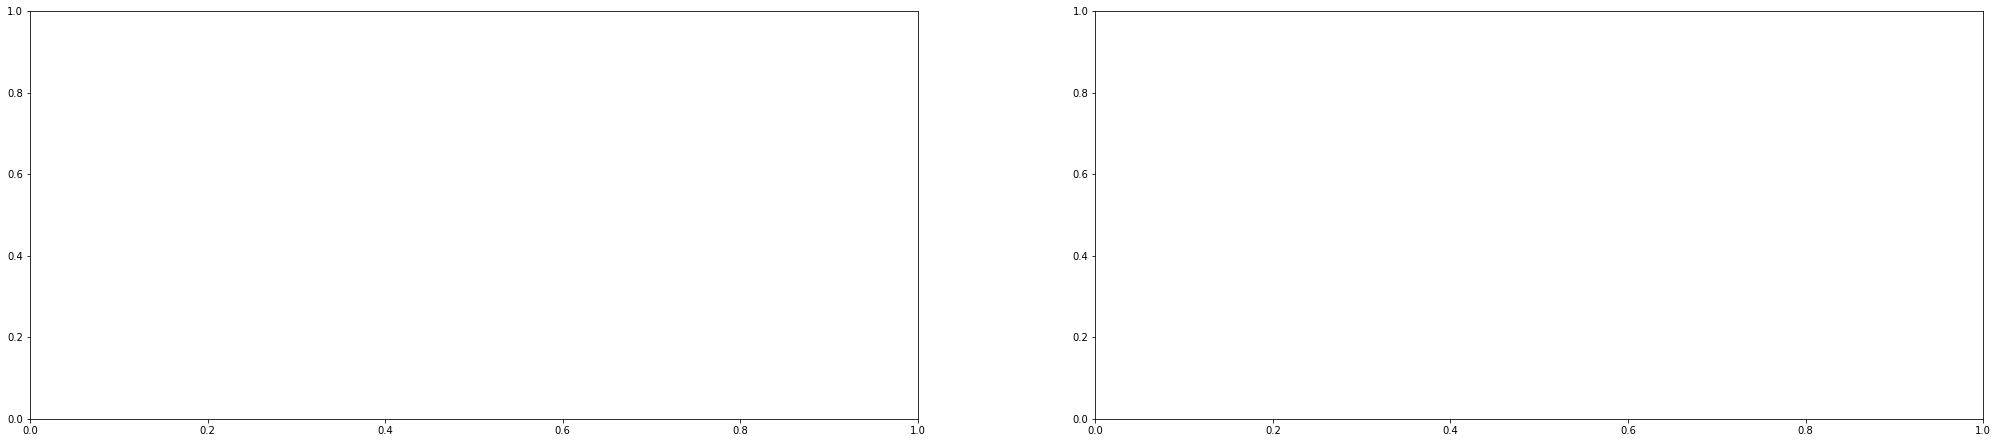

In [56]:
def compare_two_metrics(metric1, metric2,time=False):
    fix,ax=plt.subplots(1,2,figsize=(35,7.5))
    df_mean_by_generator[[metric1,metric2]].plot.bar(ax=ax[0],rot=0,stacked=False,color={'deepskyblue','sandybrown'})
    ax[0].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[0].set_title(metric1+' VS ' +metric2)
    #ax[0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[0].patches:
        ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    #plt.subplots_adjust(right=1.5)

    df_mean_by_dataset[[metric1,metric2]].plot.bar(ax=ax[1],rot=45,stacked=False,color={'deepskyblue','sandybrown'})
    ax[1].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[1].set_title(metric1+' VS ' +metric2)
    #ax[1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1].patches:
        ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    
    fix,ax=plt.subplots(figsize=(25  ,5))

    ax=df[[metric1, metric2]].plot(ax=ax,subplots=False,rot=45,kind='box')
    plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
    
    if time:

            fix,ax=plt.subplots(1,2,figsize=(35,7.5))

            ax[1]=df_mean_by_dataset[[metric2+'_time',metric1+'_time']].plot(ax=ax[1],subplots=False,rot=90,kind='bar')
            #ax[1].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[1].patches:
                ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))

            ax[0]=df_mean_by_generator[[metric2+'_time',metric1+'_time']].plot(ax=ax[0],subplots=False,rot=90,kind='bar')
            #ax[0].set_xticklabels(labels=generators_labels,fontdict={'fontsize':12 }, rotation=0)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[0].patches:
                ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
            fix,ax=plt.subplots(figsize=(25  ,5))

            ax=df[[metric2+'_time',metric1+'_time']].plot(ax=ax,subplots=False,rot=45,kind='box')
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
compare_two_metrics('AUC_ROC_based_metric_with_nn_classifier','AUC_ROC_based_metric_with_nspdk',time=False)



# Molecular metrics

In [4]:
from evaluation.utils import get_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess
from evaluation.moses.metrics.utils  import logP, QED, SA,weight
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
from rdkit import Chem
from rdkit.Chem import GetFormalCharge
from collections  import defaultdict
import pandas as pd

In [2]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

## Distribution of  QED, logP, SA and molecular weight  properties 




In [22]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
dfs=[]
for dataset_name in current_smiles_datasets:
    for split in splits:
        smiles = []
        with open('data/smiles/{}/train1_smiles.txt'.format(dataset_name + split)) as my_file:
            for line in my_file:
                smiles.append(line.strip())
        train1_graphs=smiles
        mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
        log_p =[logP(mol) for mol in mols]
        qeds= [QED(mol) for mol in mols]
        sas= [SA(mol) for mol in mols]
        weights=[weight(mol) for mol in mols]
        d1={'generator':'original','dataset':dataset_name + split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
        dfs.append(pd.DataFrame(data=d1))

        

In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
generators=['gdss','stgg','hiervae','moflow','wgan']
gens=[]
for generator_name in generators:
     for dataset_name in current_smiles_datasets:
                for split in splits:

                        print(generator_name,dataset_name+split)
                        pos_list, neg_list=[],[]
                        path_postives='data/smiles/{}/{}_gen_pos_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_postives) as my_file:
                                for line in my_file:
                                        pos_list.append(line.strip())
                        path_negatives='data/smiles/{}/{}_gen_neg_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_negatives) as my_file:
                                for line in my_file:
                                        neg_list.append(line.strip())
                        smiles=pos_list+neg_list
                        train1_graphs=smiles
                        try:
                                mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
                                log_p =[logP(mol) for mol in mols]
                                qeds= [QED(mol) for mol in mols]
                                sas= [SA(mol) for mol in mols]
                                weights=[weight(mol) for mol in mols]
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
                                gens.append(pd.DataFrame(data=d1))

                        except:
                                mols =0
                                log_p =0
                                qeds= 0
                                sas= 0
                                weights=0
                        
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':[log_p], 'qed':[qeds],'SAS':[sas],'weight':[weights]}
                                gens.append(pd.DataFrame(data=d1))

              
              
                

In [27]:
new1=pd.concat([dfs[i] for i in range(24) ], axis=0)
new2=pd.concat([gens[i] for i in range(len(gens))], axis=0)
new=pd.concat([new1,new2], axis=0)
new.to_csv('out.csv', index=False)

120

Text(0.5, 1.0, 'Molecular Weight')

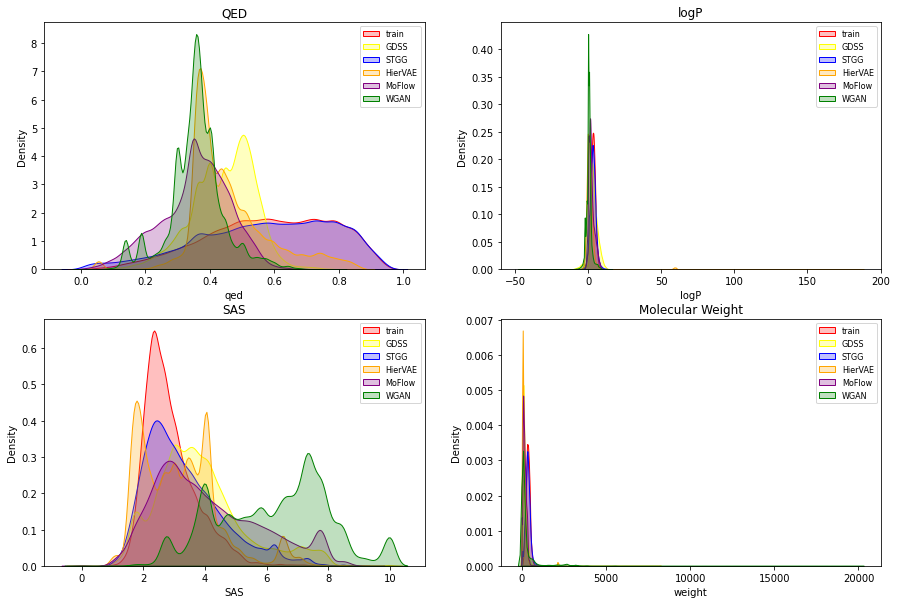

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(new[new.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(new[new.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(new[new.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(new[new.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(new[new.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(new[new.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(new[new.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(new[new.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(new[new.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


In [88]:
new_copy=new.copy()

In [99]:
only_25=new_copy.loc[(new_copy.dataset=='ames_25') | (new_copy.dataset=='bbb_martins_25') | \
                      (new_copy.dataset=='herg_karim_25') | (new_copy.dataset=='cyp1a2_veith_25') \
                        | (new_copy.dataset=='cyp2c19_veith_25')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_25')   ]
only_33=new_copy.loc[(new_copy.dataset=='ames_33') | (new_copy.dataset=='bbb_martins_33') | \
                      (new_copy.dataset=='herg_karim_33') | (new_copy.dataset=='cyp1a2_veith_33') \
                        | (new_copy.dataset=='cyp2c19_veith_33')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_33')   ]
only_40=new_copy.loc[(new_copy.dataset=='ames_40') | (new_copy.dataset=='bbb_martins_40') | \
                      (new_copy.dataset=='herg_karim_40') | (new_copy.dataset=='cyp1a2_veith_40') \
                        | (new_copy.dataset=='cyp2c19_veith_40')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_40') ]
only_50=new_copy.loc[(new_copy.dataset=='ames_50') | (new_copy.dataset=='bbb_martins_50') | \
                      (new_copy.dataset=='herg_karim_50') | (new_copy.dataset=='cyp1a2_veith_50') \
                        | (new_copy.dataset=='cyp2c19_veith_50')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_50') ]

Text(0.5, 1.0, 'Molecular Weight')

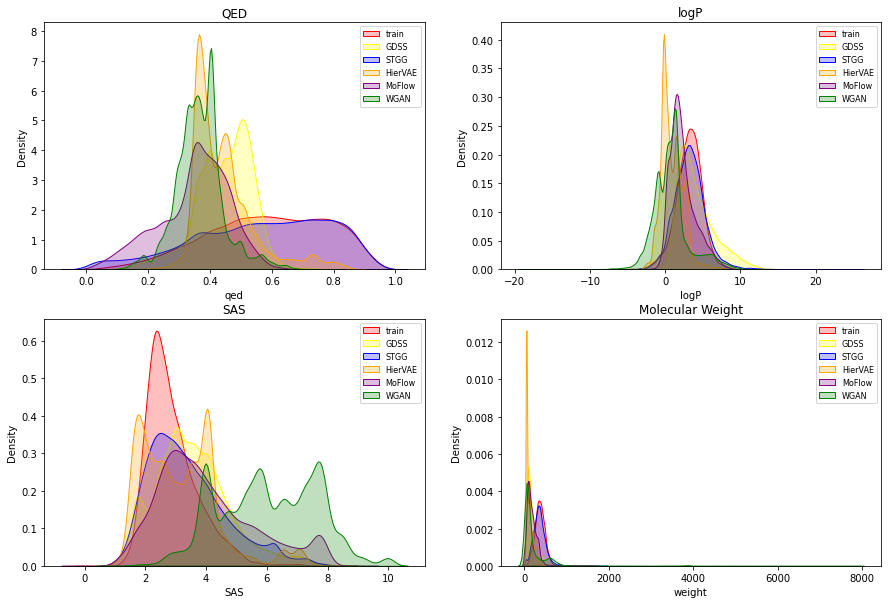

In [107]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_25[only_25.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_25[only_25.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_25[only_25.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_25[only_25.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_25[only_25.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

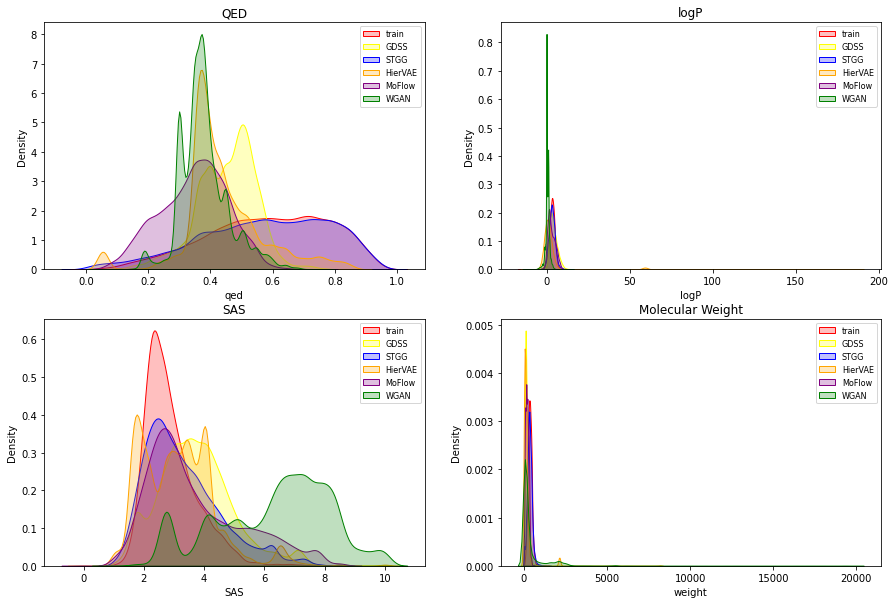

In [106]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_33[only_33.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_33[only_33.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_33[only_33.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_33[only_33.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_33[only_33.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_33[only_33.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

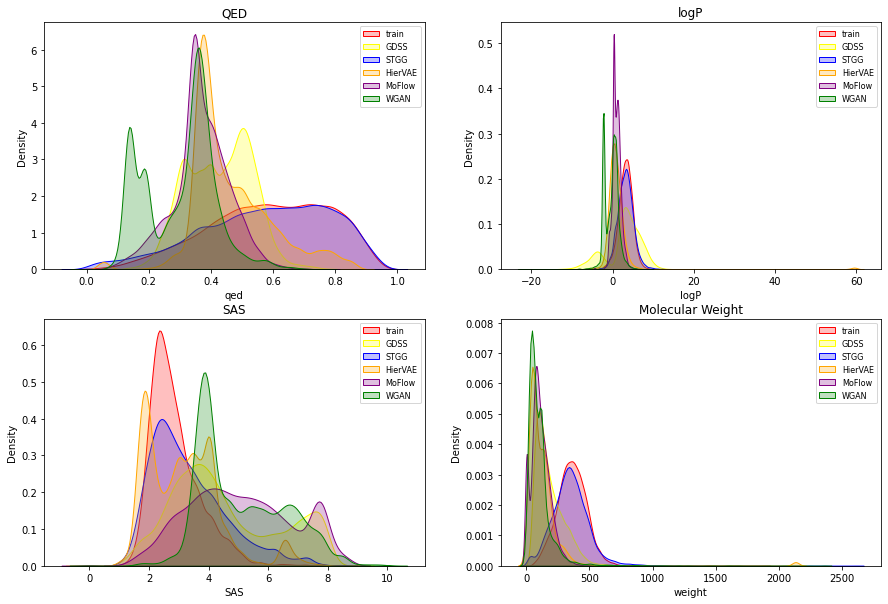

In [105]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_40[only_40.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_40[only_40.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_40[only_40.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_40[only_40.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_40[only_40.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_40[only_40.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

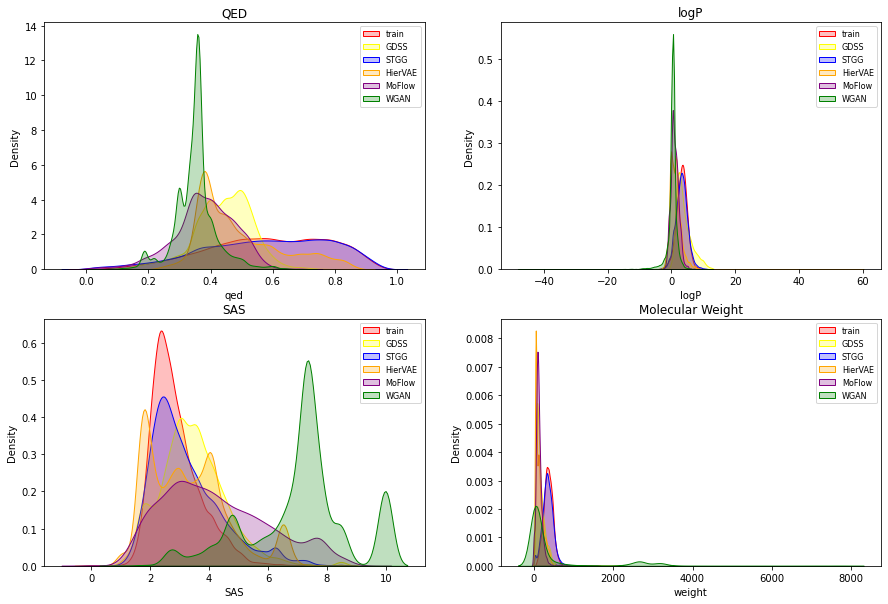

In [104]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_50[only_50.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_50[only_50.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_50[only_50.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_50[only_50.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_50[only_50.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_50[only_50.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


##  Other visualisations

In [207]:

mol_25=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
mol_25.generator_name=mol_25.generator_name+'_25'
mol_25=mol_25.groupby('generator_name').mean()


mol_33=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
mol_33.generator_name=mol_33.generator_name+'_33'
mol_33=mol_33.groupby('generator_name').mean()

mol_40=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
mol_40.generator_name=mol_40.generator_name+'_40'
mol_40=mol_40.groupby('generator_name').mean()

mol_50=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
mol_50.generator_name=mol_50.generator_name+'_50'
mol_50=mol_50.groupby('generator_name').mean()
mol_50

pd.concat([mol_25,mol_33,mol_40,mol_50]).sort_values(by=['generator_name'])

,valid,unique@1000,unique@10000,FCD/Test,SNN/Test,Frag/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,Novelty
generator_name,,,,,,,,,,,,,,,,,
gdss_25,1.0,0.075000,0.031686,0.779258,0.714585,0.926894,53.558389,0.045862,0.0,0.143934,0.109544,0.996157,4.217730,0.358310,0.097003,261.033669,1.0
gdss_33,1.0,0.087843,0.051870,0.087371,0.701463,0.978827,53.205476,0.045559,0.0,0.105152,0.089966,0.993771,3.492477,0.289779,0.093297,242.235860,1.0
gdss_40,1.0,0.134051,0.068662,0.247589,0.791773,0.961933,53.314107,0.050497,0.0,0.242158,0.204177,0.910023,5.100204,0.249763,0.082591,237.089520,1.0
gdss_50,1.0,0.104170,0.059127,0.231245,0.876068,0.958560,53.309972,0.047790,0.0,0.225944,0.180058,0.920065,4.534052,0.283604,0.083362,233.409600,1.0
hiervae_25,1.0,0.144167,0.071639,0.178134,0.935911,0.994014,52.922237,0.066249,0.0,0.434282,0.378297,0.992457,7.299111,0.144005,0.101635,307.304986,1.0
hiervae_33,1.0,0.152093,0.077416,0.146955,0.911799,0.990844,52.946507,0.067080,0.0,0.431399,0.378771,0.993283,9.682922,0.196121,0.093559,357.064476,1.0
hiervae_40,1.0,0.166238,0.089217,0.168141,0.935065,0.994989,52.917493,0.073332,0.0,0.403190,0.352886,0.995458,8.035593,0.157173,0.107968,305.620413,1.0
hiervae_50,1.0,0.187422,0.100422,0.140050,0.939238,0.993954,52.952172,0.069092,0.0,0.405835,0.359068,0.994251,6.595983,0.131491,0.103668,279.851162,1.0
moflow_25,1.0,0.583323,0.452521,0.714902,0.721666,0.920788,52.114203,0.066741,0.0,0.671509,0.619663,0.490485,7.363003,0.569966,0.092022,214.919611,1.0


In [206]:
molecular_metrics_to_display=['valid', 'Novelty','unique@1000', 'Frag/Test' ,'FCD/Test', 'FCD/TestSF','SNN/Test','SNN/TestSF' , 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight']
df_mean_by_generator[molecular_metrics_to_display]

,valid,Novelty,unique@1000,Frag/Test,FCD/Test,FCD/TestSF,SNN/Test,SNN/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
generator_name,,,,,,,,,,,,,,,
gdss,1.0,1.0,0.100266,0.956553,3.363658e-01,53.346986,0.770973,0.047427,0.179297,0.145936,0.955004,4.336116,0.295364,0.089063,243.442162
hiervae,1.0,1.0,0.162480,0.993450,1.583202e-01,52.934602,0.930503,0.068938,0.418676,0.367255,0.993862,7.903402,0.157197,0.101708,312.460260
moflow,1.0,1.0,0.620900,0.938929,6.313038e-01,52.142548,0.735833,0.068991,0.674551,0.621237,0.482847,7.358676,0.574802,0.095736,224.483915
stgg,1.0,1.0,0.778605,0.999717,3.597238e-03,53.025739,0.996328,0.089129,0.319452,0.297746,0.978244,0.800831,0.025771,0.017339,31.792756
train1,1.0,1.0,0.818481,1.000000,-6.335120e-08,53.038169,1.000000,0.089791,0.315155,0.294377,0.975788,0.000000,0.000000,0.000000,0.000000
train1/2+train2/2,1.0,1.0,0.807535,0.999988,1.283450e-03,53.031075,0.998390,0.089729,0.316387,0.295550,0.975075,0.131067,0.007149,0.003604,5.201379
train2,1.0,1.0,0.802442,0.999976,2.497879e-03,53.026236,0.997570,0.089644,0.318105,0.297097,0.975579,0.157312,0.008369,0.004271,6.620743
wgan,1.0,1.0,0.305314,0.390920,2.640481e+00,52.399314,0.493696,0.054376,0.674167,0.544385,0.418446,10.151429,0.707888,0.069168,370.350624


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


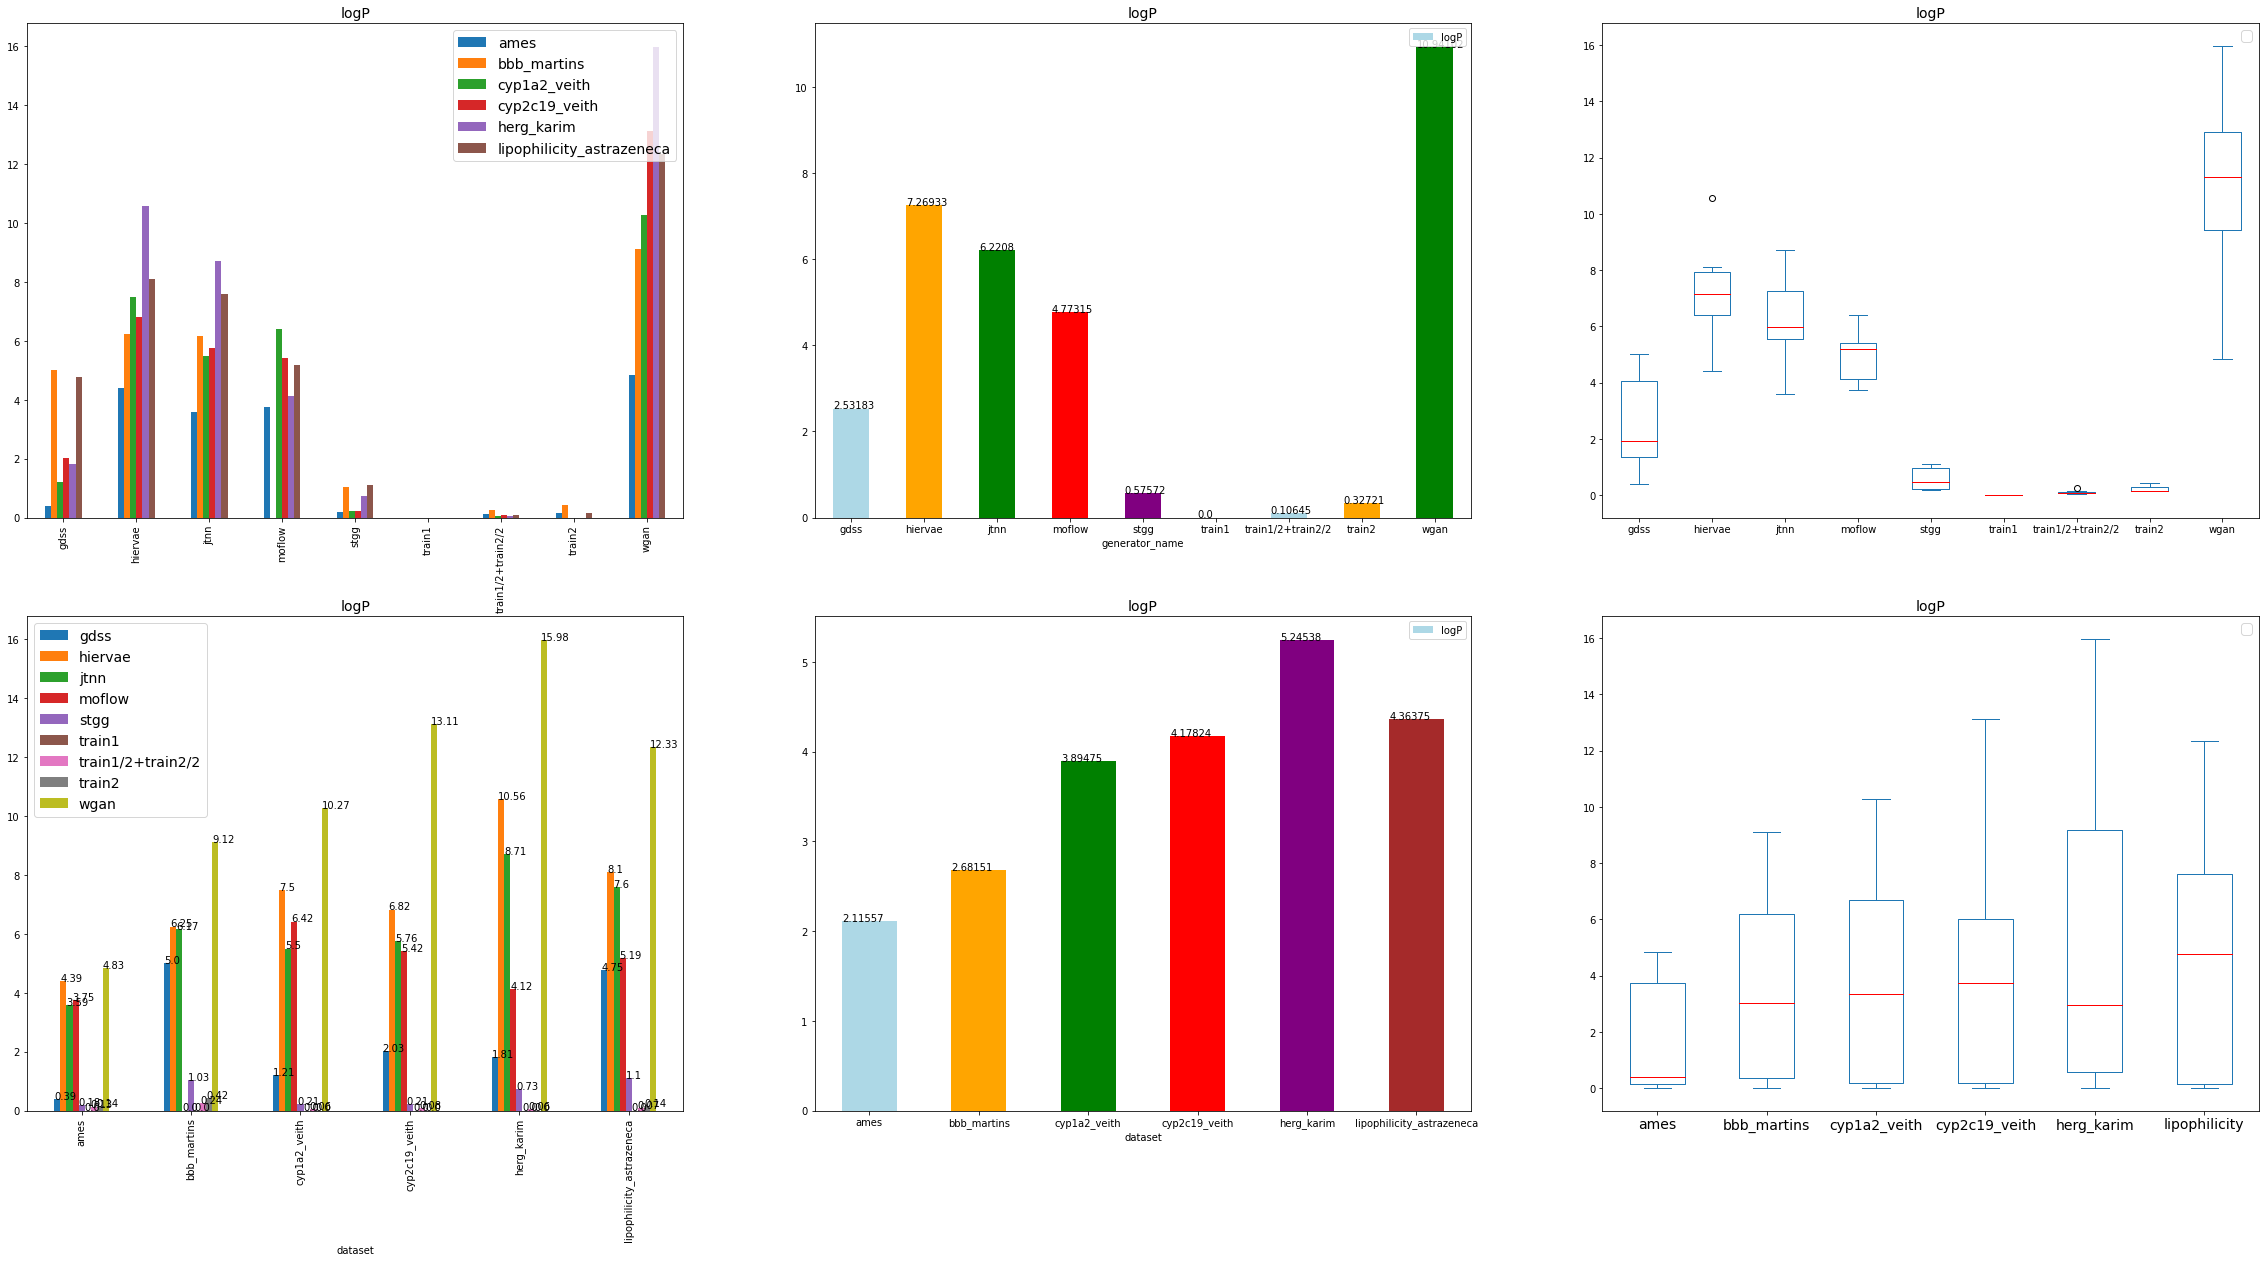

In [63]:
look_at_data_according_to_a_metric('logP')


# NN_based metrics

In [151]:
df_mean_by_generator[nn_metrics]

,precision,density,recall,coverage,f1_pr,f1_dc,fid,kid,mmd_linear,mmd_rbf
generator_name,,,,,,,,,,
gdss,0.752026,0.496943,0.081027,0.038716,0.128688,0.070110,1.078016e+03,1.273755e+06,7.991686e+02,0.703785
hiervae,0.730532,0.451736,0.132157,0.051993,0.172664,0.089370,4.094706e+02,3.292846e+05,1.753610e+02,0.801767
moflow,0.711677,0.420233,0.076210,0.050885,0.127962,0.088263,6.085311e+04,3.373772e+12,3.769812e+03,0.588873
stgg,0.910204,0.863132,0.886362,0.899458,0.897086,0.877900,2.849556e+02,4.601251e+06,3.311299e+00,0.026081
train1,1.000000,1.200277,1.000000,1.000000,1.000010,1.091034,-4.951364e-09,-3.663066e-01,0.000000e+00,0.000000
train1/2+train2/2,0.977471,1.072114,0.983519,0.999257,0.980479,1.034298,2.550888e+00,-3.728418e-02,5.018719e-02,0.000818
train2,0.964281,0.994439,0.965205,0.989332,0.964732,0.991768,6.127173e+00,2.663860e+00,8.525137e-02,0.001252
wgan,0.502285,0.215109,0.075099,0.020234,0.107066,0.035192,4.509572e+08,9.304855e+20,3.891948e+06,0.540086


In [231]:

nn_25=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
nn_25.generator_name=nn_25.generator_name+'_25'
nn_25=nn_25.groupby('generator_name').mean()


nn_33=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
nn_33.generator_name=nn_33.generator_name+'_33'
nn_33=nn_33.groupby('generator_name').mean()

nn_40=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
nn_40.generator_name=nn_40.generator_name+'_40'
nn_40=nn_40.groupby('generator_name').mean()

nn_50=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
nn_50.generator_name=nn_50.generator_name+'_50'
nn_50=nn_50.groupby('generator_name').mean()
nn_50

df3=pd.concat([nn_25,nn_33,nn_40,nn_50]).sort_values(by=['generator_name']).reset_index()
df3_gdss=df3.loc[(df3.generator_name == 'gdss_25' )|( df3.generator_name == 'gdss_33') | (df3.generator_name == 'gdss_40') | (df3.generator_name == 'gdss_50')]  
df3_stgg=df3.loc[(df3.generator_name == 'stgg_25' )|( df3.generator_name == 'stgg_33') | (df3.generator_name == 'stgg_40') | (df3.generator_name == 'stgg_50')]  
df3_moflow=df3.loc[(df3.generator_name == 'moflow_25' )|( df3.generator_name == 'moflow_33') | (df3.generator_name == 'moflow_40') | (df3.generator_name == 'moflow_50')]  
df3_hiervae=df3.loc[(df3.generator_name == 'hiervae_25' )|( df3.generator_name == 'hiervae_33') | (df3.generator_name == 'hiervae_40') | (df3.generator_name == 'hiervae_50')]  
df3_wgan=df3.loc[(df3.generator_name == 'wgan_25' )|( df3.generator_name == 'wgan_33') | (df3.generator_name == 'wgan_40') | (df3.generator_name == 'wgan_50')]  


Text(0.5, 1.0, 'hiervae')

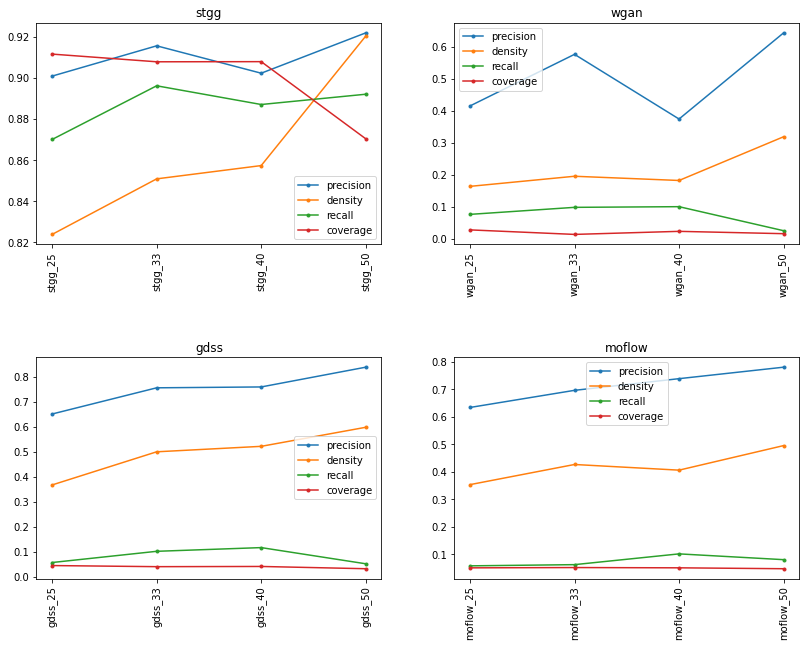

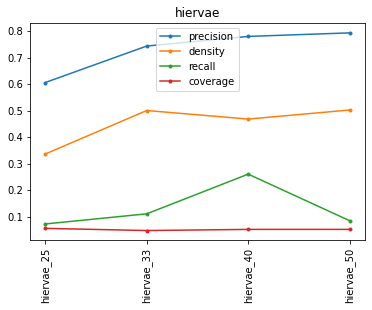

In [300]:
fig,ax=plt.subplots(2, 2, figsize=(12.5,10))

df3_stgg[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[0,0] ,kind='line',label='generator_name',rot=90,style='.-')
ax[0,0].set_xticks(df3_stgg.index)
ax[0,0].set_xticklabels(df3_stgg.generator_name)
ax[0,0].set_title('stgg')


df3_wgan[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[0,1],kind='line',label='generator_name',rot=90,style='.-')
ax[0,1].set_xticks(df3_wgan.index)
ax[0,1].set_xticklabels(df3_wgan.generator_name)
ax[0,1].set_title('wgan')


df3_gdss[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[1,0],kind='line',label='generator_name',rot=90,style='.-')
ax[1,0].set_xticks(df3_gdss.index)
ax[1,0].set_xticklabels(df3_gdss.generator_name)
ax[1,0].set_title('gdss')
fig.tight_layout(pad=5.0)

df3_moflow[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[1,1],kind='line',label='generator_name',rot=90,style='.-')
ax[1,1].set_xticks(df3_moflow.index)
ax[1,1].set_xticklabels(df3_moflow.generator_name)
ax[1,1].set_title('moflow')


ax=df3_hiervae[['precision',	'density',	'recall',	'coverage'	]].plot(kind='line',label='generator_name',rot=90,style='.-')
ax.set_xticks(df3_hiervae.index)
ax.set_xticklabels(df3_hiervae.generator_name)
ax.set_title('hiervae')




[Text(20, 0, 'wgan_25'),
 Text(21, 0, 'wgan_33'),
 Text(22, 0, 'wgan_40'),
 Text(23, 0, 'wgan_50')]

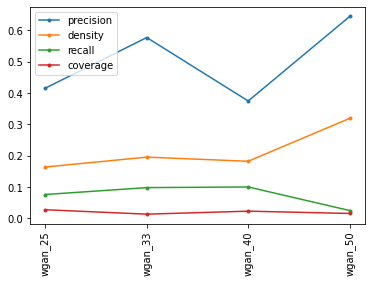

# Structural metrics



In [152]:
df_mean_by_generator[structural_metrics]

,wl_mmd,nspdk_mmd
generator_name,,
gdss,0.233167,0.183441
hiervae,0.299760,0.150957
moflow,0.533903,0.199128
stgg,0.007761,0.006462
train1,0.000000,0.000000
train1/2+train2/2,0.000243,0.000569
train2,0.000411,0.000914
wgan,0.937959,0.379814


In [301]:

nn_25=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
nn_25.generator_name=nn_25.generator_name+'_25'
nn_25=nn_25.groupby('generator_name').mean()


nn_33=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
nn_33.generator_name=nn_33.generator_name+'_33'
nn_33=nn_33.groupby('generator_name').mean()

nn_40=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
nn_40.generator_name=nn_40.generator_name+'_40'
nn_40=nn_40.groupby('generator_name').mean()

nn_50=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
nn_50.generator_name=nn_50.generator_name+'_50'
nn_50=nn_50.groupby('generator_name').mean()
nn_50

df3=pd.concat([nn_25,nn_33,nn_40,nn_50]).sort_values(by=['generator_name']).reset_index()
df3_gdss=df3.loc[(df3.generator_name == 'gdss_25' )|( df3.generator_name == 'gdss_33') | (df3.generator_name == 'gdss_40') | (df3.generator_name == 'gdss_50')]  
df3_stgg=df3.loc[(df3.generator_name == 'stgg_25' )|( df3.generator_name == 'stgg_33') | (df3.generator_name == 'stgg_40') | (df3.generator_name == 'stgg_50')]  
df3_moflow=df3.loc[(df3.generator_name == 'moflow_25' )|( df3.generator_name == 'moflow_33') | (df3.generator_name == 'moflow_40') | (df3.generator_name == 'moflow_50')]  
df3_hiervae=df3.loc[(df3.generator_name == 'hiervae_25' )|( df3.generator_name == 'hiervae_33') | (df3.generator_name == 'hiervae_40') | (df3.generator_name == 'hiervae_50')]  
df3_wgan=df3.loc[(df3.generator_name == 'wgan_25' )|( df3.generator_name == 'wgan_33') | (df3.generator_name == 'wgan_40') | (df3.generator_name == 'wgan_50')]  


Text(0.5, 1.0, 'hiervae')

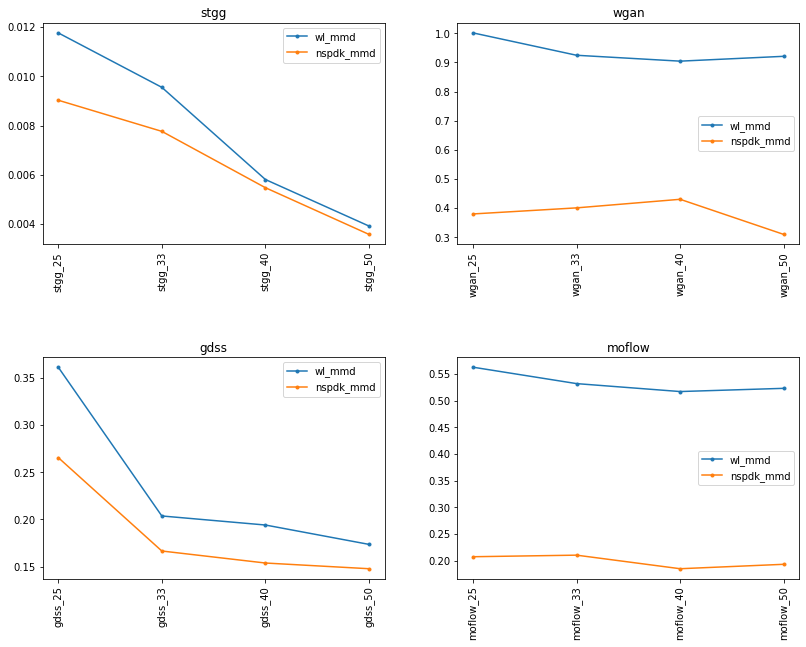

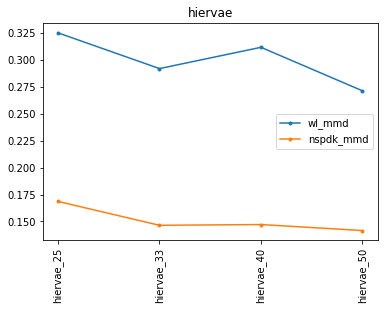

In [303]:
fig,ax=plt.subplots(2, 2, figsize=(12.5,10))
df3_stgg[[	'wl_mmd',	'nspdk_mmd']].plot(ax=ax[0,0] ,kind='line',label='generator_name',rot=90,style='.-')
ax[0,0].set_xticks(df3_stgg.index)
ax[0,0].set_xticklabels(df3_stgg.generator_name)
ax[0,0].set_title('stgg')


df3_wgan[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[0,1],kind='line',label='generator_name',rot=90,style='.-')
ax[0,1].set_xticks(df3_wgan.index)
ax[0,1].set_xticklabels(df3_wgan.generator_name)
ax[0,1].set_title('wgan')


df3_gdss[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[1,0],kind='line',label='generator_name',rot=90,style='.-')
ax[1,0].set_xticks(df3_gdss.index)
ax[1,0].set_xticklabels(df3_gdss.generator_name)
ax[1,0].set_title('gdss')
fig.tight_layout(pad=5.0)

df3_moflow[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[1,1],kind='line',label='generator_name',rot=90,style='.-')
ax[1,1].set_xticks(df3_moflow.index)
ax[1,1].set_xticklabels(df3_moflow.generator_name)
ax[1,1].set_title('moflow')


ax=df3_hiervae[['wl_mmd',	'nspdk_mmd'	]].plot(kind='line',label='generator_name',rot=90,style='.-')
ax.set_xticks(df3_hiervae.index)
ax.set_xticklabels(df3_hiervae.generator_name)
ax.set_title('hiervae')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (6).

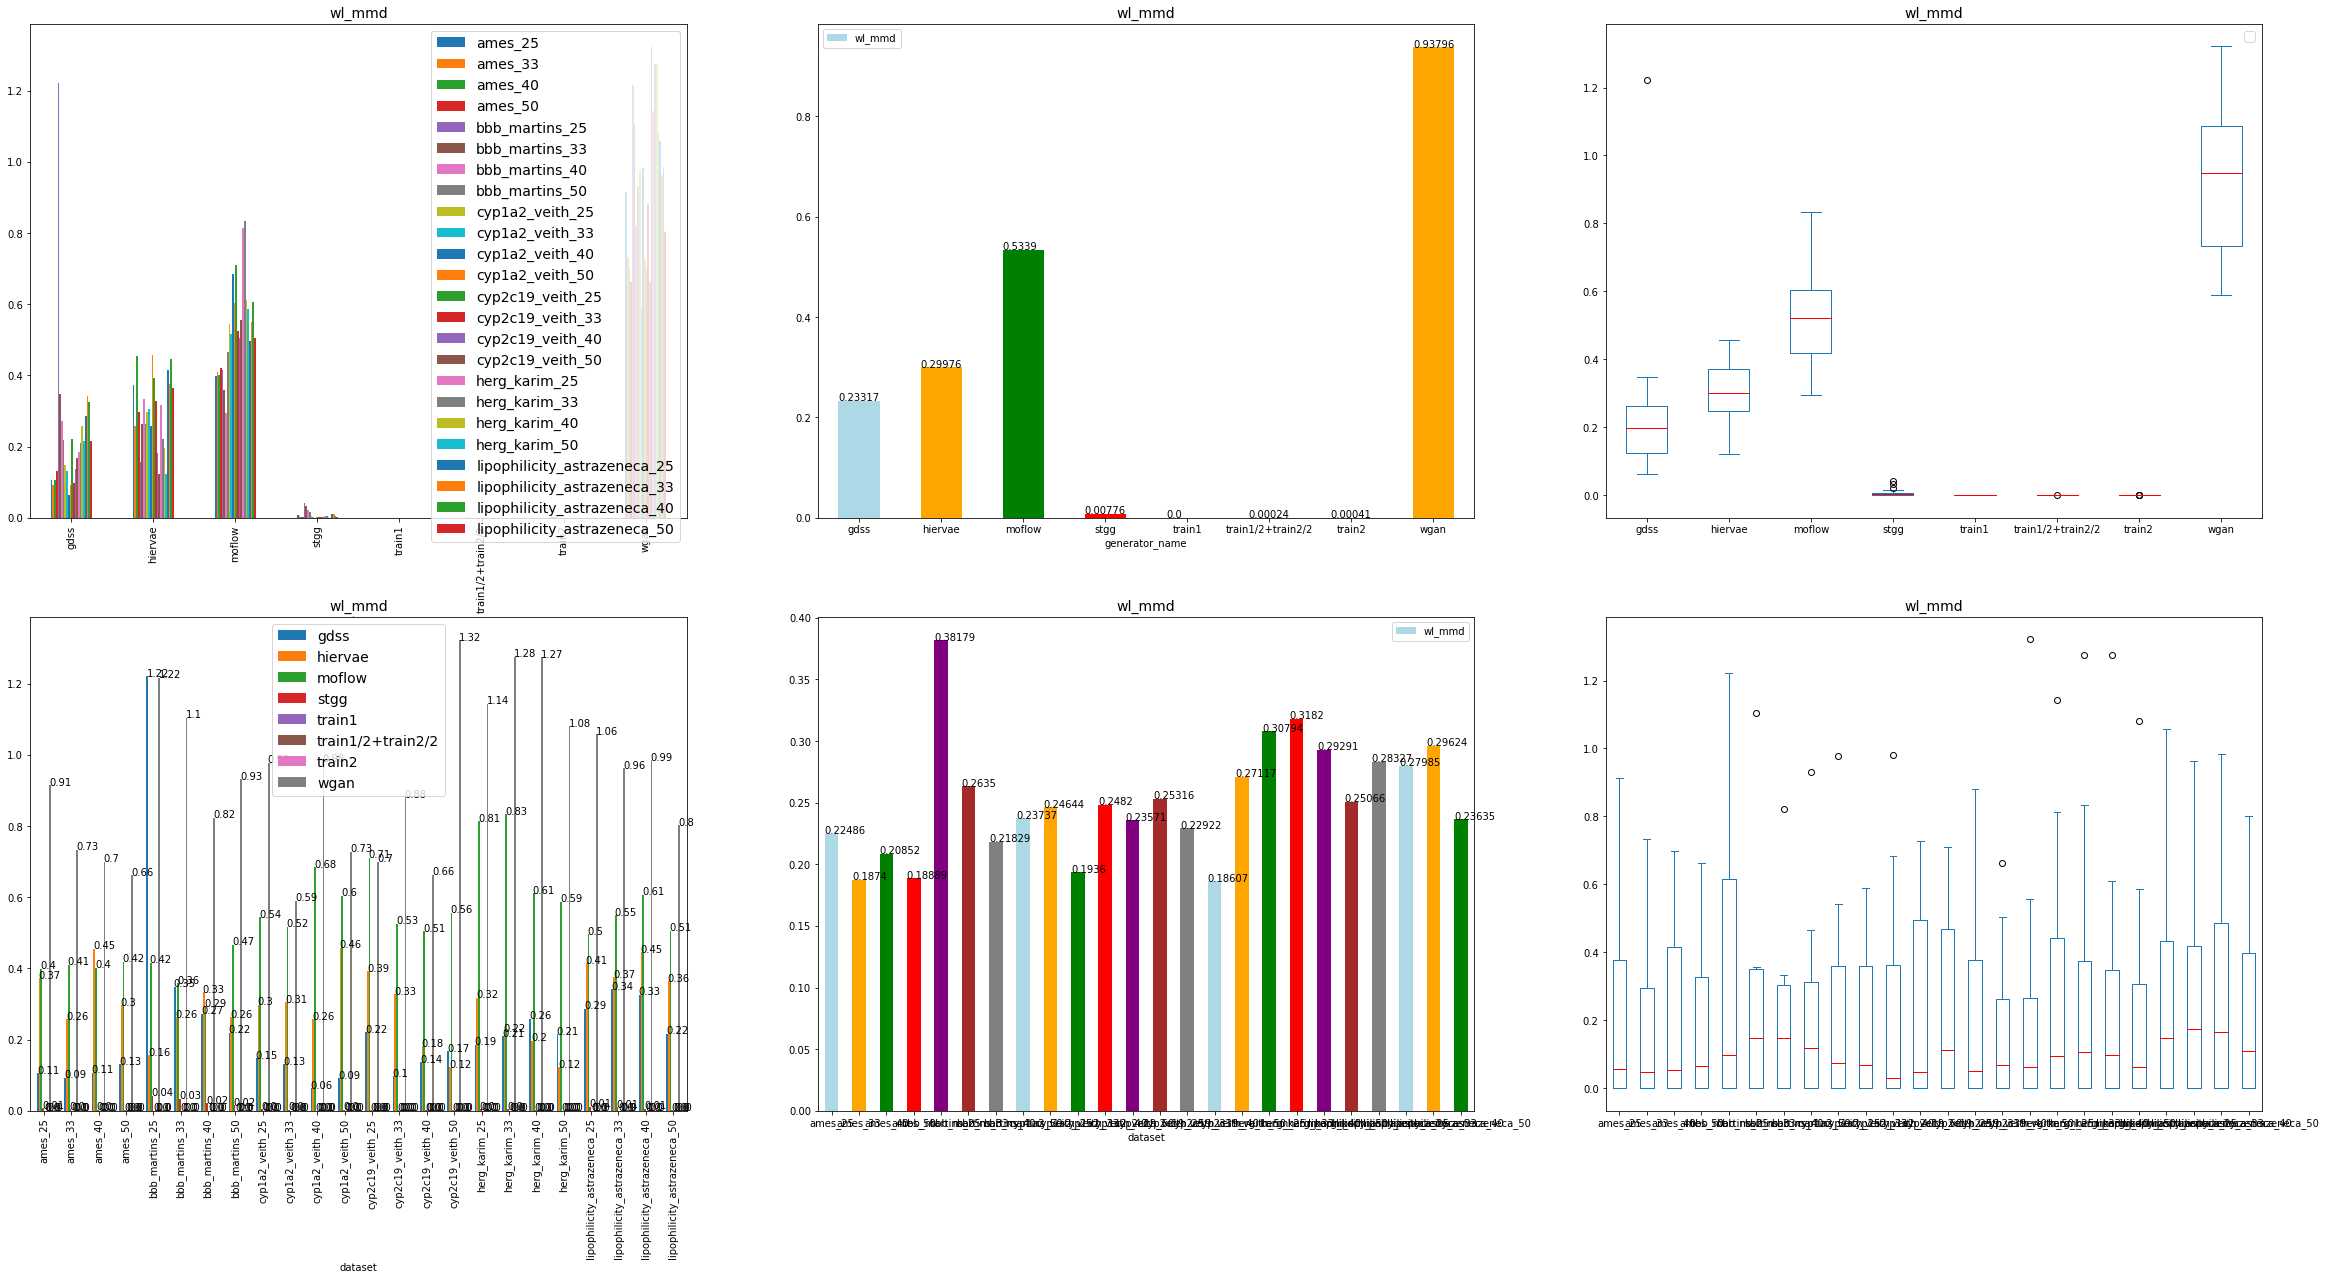

In [153]:
look_at_data_according_to_a_metric('wl_mmd')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


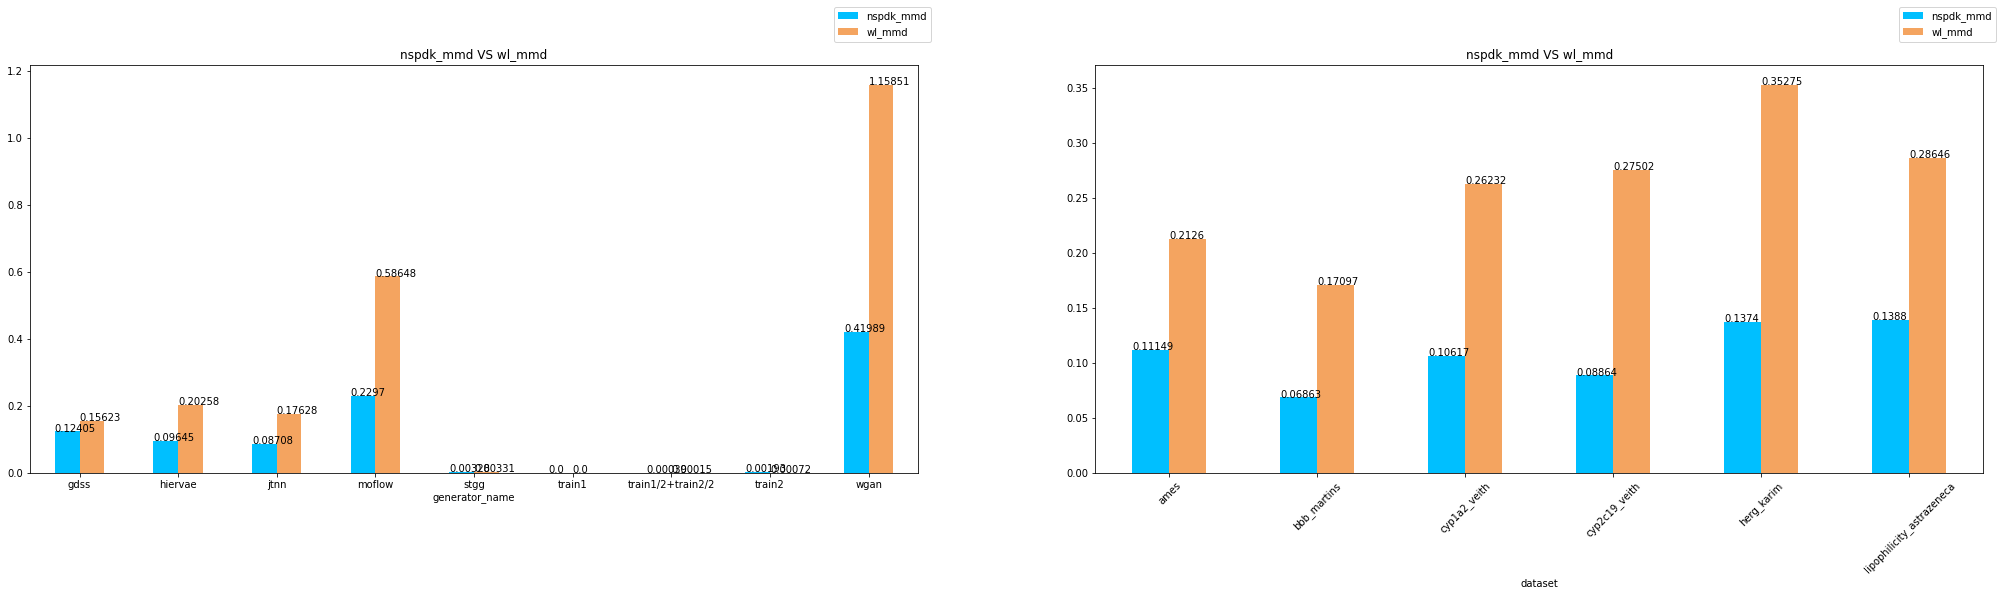

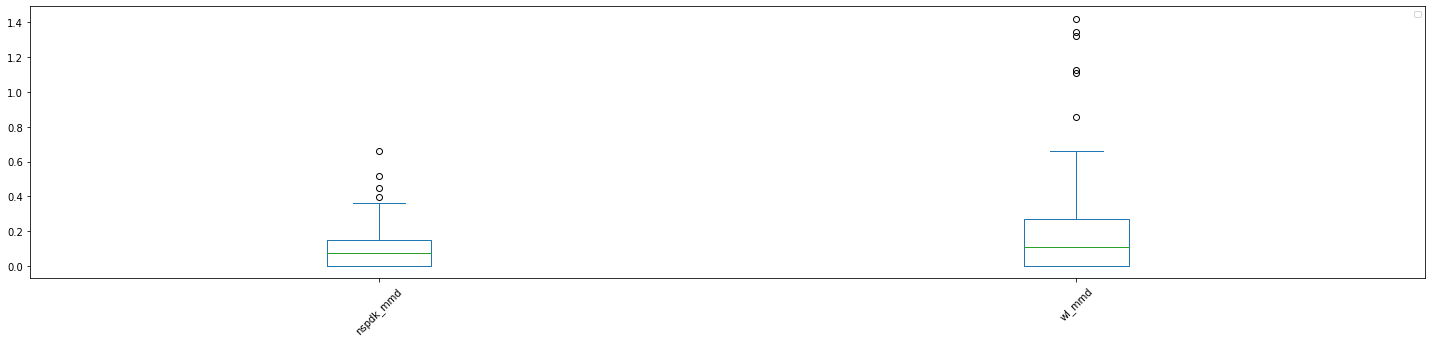

In [61]:
compare_two_metrics('nspdk_mmd','wl_mmd')


# Draft section